<H1>Step 1: Recueillir les données (Data Collection)</H1>

In [7]:
import pandas as pd
#charger le fichier Excel 
file_path= '/home/lamsiyehkhawla/Downloads/sales.xlsx'
sales_df=pd.read_excel(file_path)
print("Colonnes du fichier :", sales_df.columns.tolist())



Colonnes du fichier : ['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index', 'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index', 'Product Description Index', 'Order Quantity', 'Unit Selling Price', 'Unit Cost']


In [10]:
import pandas as pd
#charger le fichier Excel 
file_path= '/home/lamsiyehkhawla/Downloads/sales.xlsx'
sales_df=pd.read_excel(file_path)

# Netooyage des colonnes
sales_df.columns = sales_df.columns.str.strip()
#renommer les colonnes à utiliser 
sales_df= sales_df.rename(columns={
    'OrderDate': 'Date',
    'Order Quantity': 'Order_Quantity',
    'Unit Selling Price': 'Unit_Selling_Price',
    'Unit Cost': 'Unit_cost',
    'Customer Name Index': 'Customer',
    'Product Description Index': 'Product',
    'Delivery Region Index': 'Region'
})
# Calculer les champs nécessaires 
sales_df['Sales']=sales_df['Order_Quantity'] * sales_df['Unit_Selling_Price']
sales_df['Cost'] = sales_df['Order_Quantity'] * sales_df['Unit_cost']
sales_df['Profit'] = sales_df['Sales'] - sales_df['Cost']
print(sales_df.head())

    OrderNumber       Date  Ship Date  Customer      Channel Currency Code  \
0   SO - 000225 2017-01-01 2017-01-13        28    Wholesale           NZD   
1  SO - 0003378 2017-01-01 2017-01-06         7  Distributor           NZD   
2  SO - 0003901 2017-01-01 2017-01-05        12    Wholesale           NZD   
3  SO - 0005126 2017-01-01 2017-01-17         5    Wholesale           USD   
4  SO - 0005614 2017-01-01 2017-01-07        27       Export           NZD   

  Warehouse Code  Region  Product  Order_Quantity  Unit_Selling_Price  \
0         AXW291      71       11               6              2499.1   
1         AXW291      54        7              11              2351.7   
2         AXW291      58       13               5              1728.6   
3         AXW291      29        7               6               978.2   
4         AXW291      31        6               7              2338.3   

   Unit_cost    Sales       Cost     Profit  
0   1824.343  14994.6  10946.058   4048.542  


<H1> Step 2: Nettoyage et transformation (ETL)</H1> 


In [11]:
#Supprimer les doublons
sales_df=sales_df.drop_duplicates()

print("Valeurs manquantes par colonne :")
print(sales_df.isna().sum())
sales_df = sales_df.dropna(subset=['Date','Sales','Profit','Cost','Order_Quantity'])

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

print(sales_df.dtypes)

Valeurs manquantes par colonne :
OrderNumber           0
Date                  0
Ship Date             0
Customer              0
Channel               0
Currency Code         0
Warehouse Code        0
Region                0
Product               0
Order_Quantity        0
Unit_Selling_Price    0
Unit_cost             0
Sales                 0
Cost                  0
Profit                0
dtype: int64
OrderNumber                   object
Date                  datetime64[ns]
Ship Date             datetime64[ns]
Customer                       int64
Channel                       object
Currency Code                 object
Warehouse Code                object
Region                         int64
Product                        int64
Order_Quantity                 int64
Unit_Selling_Price           float64
Unit_cost                    float64
Sales                        float64
Cost                         float64
Profit                       float64
dtype: object


<H1>Step 3: Créer un DataFrame des dates</H1>

In [22]:
#Extraire les dates min et max 
min_date = sales_df['Date'].min()
max_date = sales_df['Date'].max()

#Créer la table des dates 
#Genrer les ates entre la date min et max d'une maniere quotidienne 
date_range = pd.date_range(start=min_date, end=max_date,freq='D')
#DataFrame contiendra une seule colonne 'Date' qui contient toutes les dates générées dans date_range.
date_df = pd.DataFrame({'Date': date_range})
#Cela extrait l'année de chaque date dans la colonne 'Date' et la place dans une nouvelle colonne 'Year'.
date_df['Year'] = date_df['Date'].dt.year
#ela extrait le mois (sous forme de nombre de 1 à 12) et l'ajoute dans la colonne 'Month'
date_df['Month'] = date_df['Date'].dt.month
#Cela extrait le nom complet du mois (par exemple, "janvier", "février") et l'ajoute dans la colonne 
date_df['Month_Name'] = date_df['Date'].dt.strftime('%B')
#Cela détermine le trimestre de l'année (1, 2, 3 ou 4) et l'ajoute dans la colonne 'Quarter'.
date_df['Quarter'] = date_df['Date'].dt.quarter
#ela extrait le nom du jour de la semaine (par exemple, "lundi", "mardi") et l'ajoute dans la colonne 
date_df['Weekday'] = date_df['Date'].dt.day_name()

print(date_df.head())


        Date  Year  Month Month_Name  Quarter    Weekday
0 2017-01-01  2017      1    January        1     Sunday
1 2017-01-02  2017      1    January        1     Monday
2 2017-01-03  2017      1    January        1    Tuesday
3 2017-01-04  2017      1    January        1  Wednesday
4 2017-01-05  2017      1    January        1   Thursday


<H1>Step 4: Créer les mesures et indicateurs</H1>

In [32]:
sales_df_copy = sales_df.copy()

#Ajouter colonne annee et mois
sales_df_copy['Year'] = sales_df_copy['Date'].dt.year
sales_df_copy['Month'] = sales_df_copy['Date'].dt.month
sales_df_copy['Month_Name'] = sales_df_copy['Date'].dt.strftime('%B')


print(sales_df_copy[['Date','Year','Month','Month_Name']].head())

        Date  Year  Month Month_Name
0 2017-01-01  2017      1    January
1 2017-01-01  2017      1    January
2 2017-01-01  2017      1    January
3 2017-01-01  2017      1    January
4 2017-01-01  2017      1    January


<H2>Total Sales</H2>



In [42]:
total_sales = sales_df_copy['Sales'].sum()
print(f"Total sales : {total_sales:.2f} MAD")

Total sales : 154573140.60 MAD


<h2>Total Sales PY (Previous Year)</h2>

In [45]:
# contiendra un nouveau DataFrame avec deux colonnes Year et Sales
#Le résultat est un DataFrame propre où chaque ligne contient une année et le total des ventes pour cette année.
sales_by_year = sales_df_copy.groupby('Year')['Sales'].sum().reset_index()

print("Ventes par année")
print(sales_by_year)

if len(sales_by_year) >= 2:
    current_year_sales = sales_by_year.iloc[-1]['Sales']
    prev_year_sales = sales_by_year.iloc[-2]['Sales']
else:
    current_year_sales = total_sales
    prev_year_sales = 0

Ventes par année
   Year       Sales
0  2017  52580534.7
1  2018  53463661.7
2  2019  48528944.2


<h2>Total Sales/PY Var</h2>

In [48]:
sales_diff = current_year_sales - prev_year_sales
print(f"Difference ventes (année en cours - précédente) : {sales_diff:.2f} MAD")

Difference ventes (année en cours - précédente) : -4934717.50 MAD


<h2>Total Sales/PY Var %</h2>

In [49]:
if prev_year_sales != 0:
    sales_var_pct = (sales_diff / prev_year_sales) * 100
else:
    sales_var_pct = 0

print(f"VAriation en % des ventes YOY : {sales_var_pct : .2f}%")

VAriation en % des ventes YOY : -9.23%


<h2>Total Order Quantity</h2>

In [52]:
total_orders =sales_df_copy['Order_Quantity'].sum()
print(f"Quantité totale commandée : {total_orders}")

Quantité totale commandée : 67579


<h2>Total Profit</h2>

In [54]:
total_profit=sales_df_copy['Profit'].sum()
print(f"Profit total :{total_profit:.2f}MAD")

Profit total :57789142.91MAD


<h2>Total Profit PY</h2>

In [55]:
profit_by_year = sales_df_copy.groupby('Year')['Profit'].sum().reset_index()

print("Profit par année :")
print(profit_by_year)
if len(profit_by_year) >=2:
    current_profit = profit_by_year.iloc[-1]['Profit']
    prev_profit = profit_by_year.iloc[-2]['Profit']
else:
    current_profit = total_profit
    prev_profit = 0

Profit par année :
   Year        Profit
0  2017  1.967777e+07
1  2018  1.978919e+07
2  2019  1.832218e+07


<h2>Total Profit/PY Var </h2>

In [57]:
profit_diff = current_profit - prev_profit
print(f" Différence profit : {profit_diff:.2f} MAD")

 Différence profit : -1467008.35 MAD


<h2>Total Profit/PY Var % </h2>

In [59]:
if prev_profit != 0:
    profit_var_pct = (profit_diff / prev_profit) * 100
else:
    profit_var_pct = 0
print(f" Variation % du profit YOY : {profit_var_pct:.2f}%")

 Variation % du profit YOY : -7.41%


<h2>Profit Margin % </h2>

In [61]:
if total_sales != 0:
    profit_margin_pct = (total_profit / total_sales) * 100
else:
    profit_margin_pct = 0
print(f" Marge bénéficiaire : {profit_margin_pct:.2f}%")

 Marge bénéficiaire : 37.39%


<h2>Total Cost</h2>

In [63]:
total_cost = sales_df_copy['Cost'].sum()
print(f"Coût total : {total_cost:.2f} MAD")

Coût total : 96783997.69 MAD


<h2>Order Quantity vs Previous Year</h2>

In [67]:
orders_by_year = sales_df_copy.groupby('Year')['Order_Quantity'].sum().reset_index()

if len(orders_by_year) >= 2:
    current_orders = orders_by_year.iloc[-1]['Order_Quantity']
    prev_orders = orders_by_year.iloc[-2]['Order_Quantity']
else:
    current_orders = total_orders
    prev_orders = 0

# Variation brute
orders_diff = current_orders - prev_orders
# Variation en %
if prev_orders != 0:
    orders_diff_pct = (orders_diff / prev_orders) * 100
else:
    orders_diff_pct = 0

print(f" Variation commandes : {orders_diff} commandes, soit {orders_diff_pct:.2f}%")

 Variation commandes : -1779 commandes, soit -7.68%


<h2>Développer les visuels </h2>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour affichage correct dans les notebooks
%matplotlib inline

<h2>Ventes par produit et comparaison avec l’année précédente</h2>

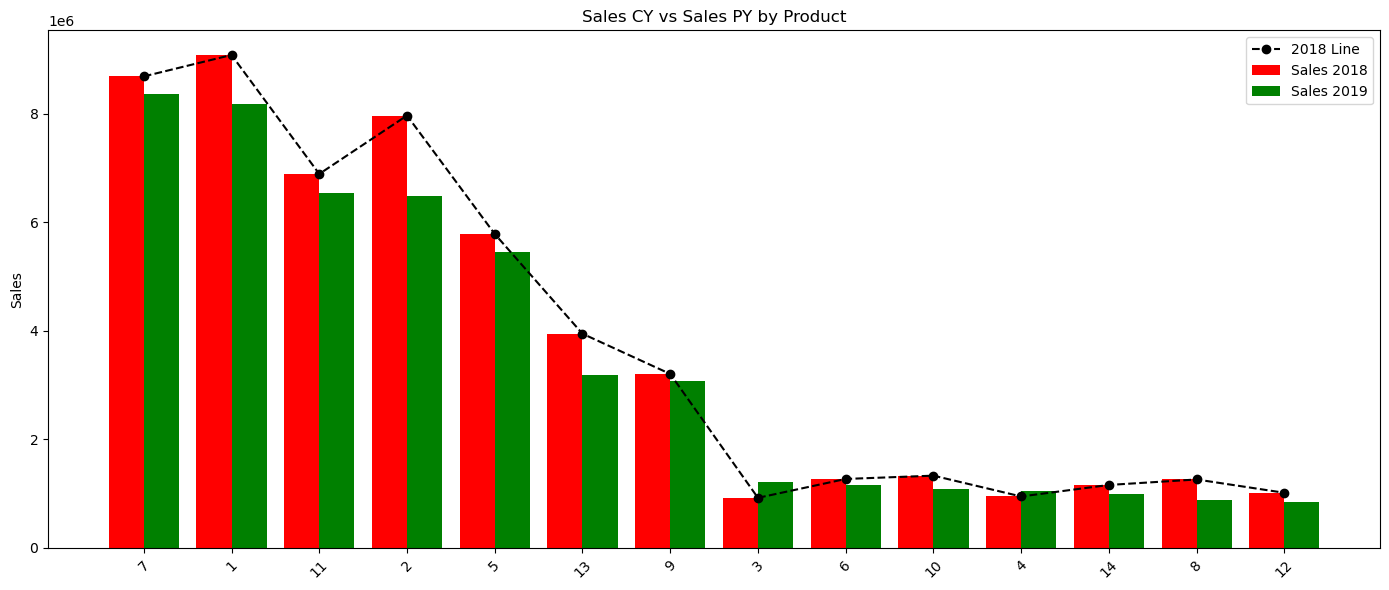

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Product and Year
sales_product_year = sales_df_copy.groupby(['Product', 'Year'])['Sales'].sum().reset_index()

# Pivot to get one column for each year's sales
pivot_df = sales_product_year.pivot(index='Product', columns='Year', values='Sales').fillna(0)

# Sort products by current year sales (last column)
pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)

# Extract current and previous year (last and second-last column)
current_year = pivot_df.columns[-1]
prev_year = pivot_df.columns[-2] if len(pivot_df.columns) >= 2 else None

# Plot setup
plt.figure(figsize=(14, 6))

bar_width = 0.4
x = range(len(pivot_df))

# Bar: Previous Year (Red)
plt.bar([i - bar_width/2 for i in x], pivot_df[prev_year], width=bar_width, label=f'Sales {prev_year}', color='red')

# Bar: Current Year (Green)
plt.bar([i + bar_width/2 for i in x], pivot_df[current_year], width=bar_width, label=f'Sales {current_year}', color='green')

# Dotted Line: Previous Year
plt.plot(x, pivot_df[prev_year], color='black', linestyle='--', marker='o', label=f'{prev_year} Line')

# Labels and formatting
plt.xticks(x, pivot_df.index, rotation=45)
plt.ylabel('Sales')
plt.title('Sales CY vs Sales PY by Product')
plt.legend()
plt.tight_layout()
plt.show()


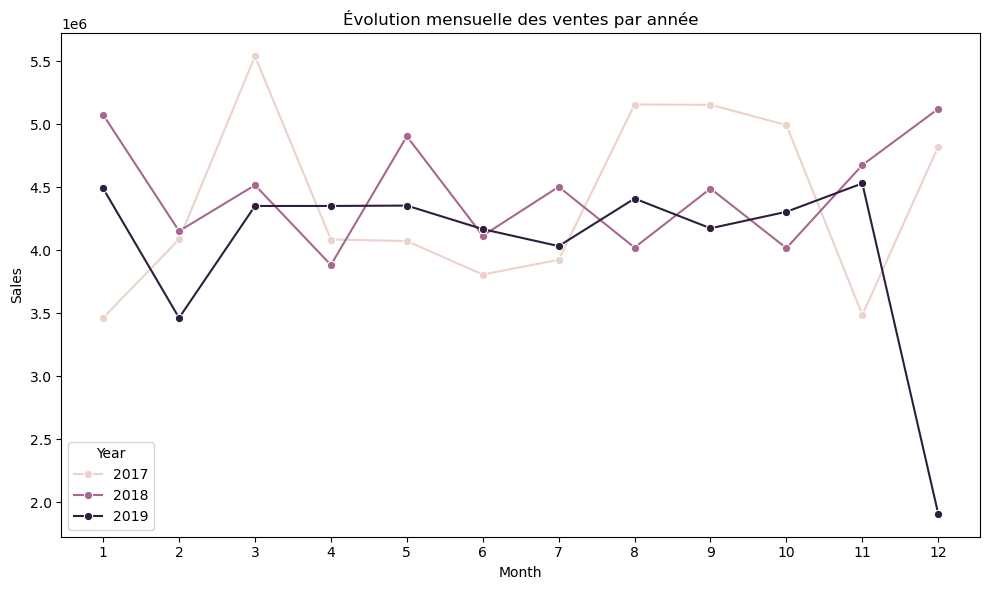

In [71]:
# Ventes par mois et par année
sales_month_year = sales_df_copy.groupby(['Month', 'Year'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_month_year, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Évolution mensuelle des ventes par année")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

In [73]:
# Top 5 villes
top_cities = sales_df_copy.groupby('City')['Sales'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=top_cities, x='City', y='Sales', palette='viridis')
plt.title("Top 5 des villes selon les ventes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'City'

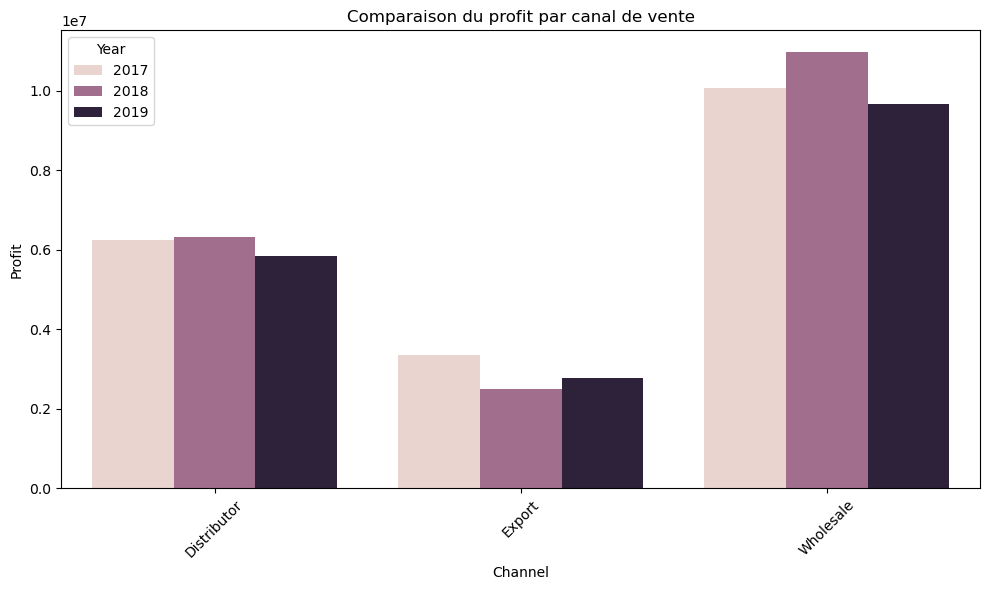

In [74]:
# Bénéfices par canal et année
profit_channel_year = sales_df_copy.groupby(['Channel', 'Year'])['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=profit_channel_year, x='Channel', y='Profit', hue='Year')
plt.title("Comparaison du profit par canal de vente")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

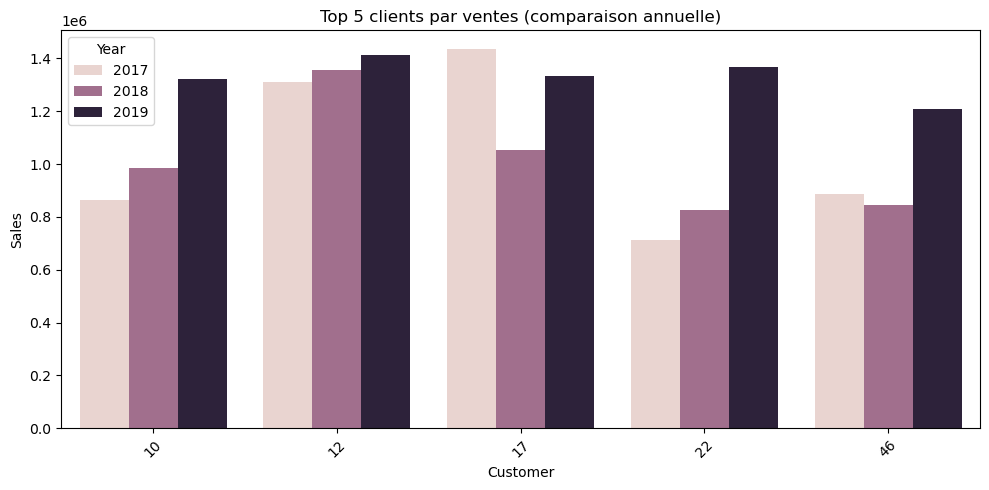

In [78]:
# Ventes par client
client_sales = sales_df_copy.groupby(['Customer', 'Year'])['Sales'].sum().reset_index()

# Top 5 clients (année en cours uniquement)
top_customers = (
    client_sales[client_sales['Year'] == sales_df_copy['Year'].max()]
    .nlargest(5, 'Sales')
    .Customer
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=client_sales[client_sales['Customer'].isin(top_customers)],
    x='Customer', y='Sales', hue='Year'
)
plt.title("Top 5 clients par ventes (comparaison annuelle)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


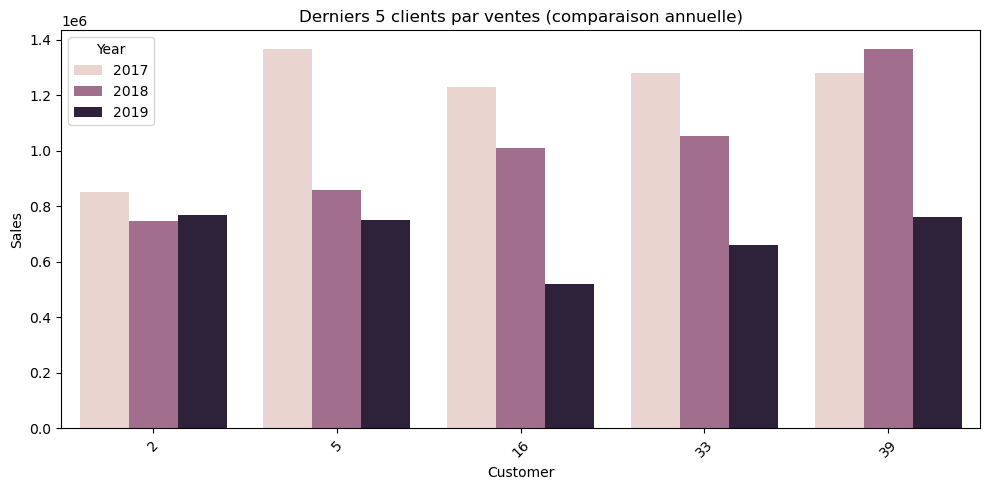

In [80]:

# Bottom 5 clients (année en cours uniquement)
last_customers = (
    client_sales[client_sales['Year'] == sales_df_copy['Year'].max()]
    .nsmallest(5, 'Sales')
    .Customer
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=client_sales[client_sales['Customer'].isin(last_customers)],
    x='Customer', y='Sales', hue='Year'
)
plt.title("Derniers 5 clients par ventes (comparaison annuelle)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [84]:
# sales_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1. Chargement des données
# ===============================
file_path= '/home/lamsiyehkhawla/Downloads/sales.xlsx'
df=pd.read_excel(file_path)
# ===============================
# 2. Nettoyage et transformation
# ===============================

# Netooyage des colonnes
df.columns = df.columns.str.strip()
#renommer les colonnes à utiliser 
df= df.rename(columns={
    'OrderDate': 'Date',
    'Order Quantity': 'Order_Quantity',
    'Unit Selling Price': 'Unit_Selling_Price',
    'Unit Cost': 'Unit_cost',
    'Customer Name Index': 'Customer',
    'Product Description Index': 'Product',
    'Delivery Region Index': 'Region'
})
# Calculer les champs nécessaires 
df['Sales']=df['Order_Quantity'] * df['Unit_Selling_Price']
df['Cost'] = df['Order_Quantity'] * df['Unit_cost']
df['Profit'] = df['Sales'] - df['Cost']

# ===============================
# 3. Table de dates
# ===============================
min_date, max_date = df['Date'].min(), df['Date'].max()
date_df = pd.DataFrame({'Date': pd.date_range(min_date, max_date)})
date_df['Year'] = date_df['Date'].dt.year
date_df['Month'] = date_df['Date'].dt.month
date_df['Month_Name'] = date_df['Date'].dt.strftime('%B')
date_df['Quarter'] = date_df['Date'].dt.quarter
date_df['Weekday'] = date_df['Date'].dt.day_name()

# ===============================
# 4. Calcul des mesures
# ===============================
total_sales = df['Sales'].sum()
total_orders = df['Order_Quantity'].sum()
total_profit = df['Profit'].sum()
total_cost = df['Cost'].sum()

sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()
orders_by_year = df.groupby('Year')['Order Quantity'].sum().reset_index()

# Comparaison année précédente
if len(sales_by_year) >= 2:
    current_year_sales = sales_by_year.iloc[-1]['Sales']
    prev_year_sales = sales_by_year.iloc[-2]['Sales']
    sales_diff = current_year_sales - prev_year_sales
    sales_var_pct = (sales_diff / prev_year_sales) * 100 if prev_year_sales != 0 else 0
else:
    sales_diff, sales_var_pct = 0, 0

if len(profit_by_year) >= 2:
    current_profit = profit_by_year.iloc[-1]['Profit']
    prev_profit = profit_by_year.iloc[-2]['Profit']
    profit_diff = current_profit - prev_profit
    profit_var_pct = (profit_diff / prev_profit) * 100 if prev_profit != 0 else 0
else:
    profit_diff, profit_var_pct = 0, 0

if len(orders_by_year) >= 2:
    current_orders = orders_by_year.iloc[-1]['Order_Quantity']
    prev_orders = orders_by_year.iloc[-2]['Order_Quantity']
    orders_diff = current_orders - prev_orders
    orders_var_pct = (orders_diff / prev_orders) * 100 if prev_orders != 0 else 0
else:
    orders_diff, orders_var_pct = 0, 0

profit_margin_pct = (total_profit / total_sales) * 100 if total_sales != 0 else 0

# ===============================
# 5. Visualisations
# ===============================
sns.set(style="whitegrid")

# Ventes par produit (comparaison annuelle)
plt.figure(figsize=(12,6))
sales_product_year = df.groupby(['Product', 'Year'])['Sales'].sum().reset_index()
sns.barplot(data=sales_product_year, x='Product', y='Sales', hue='Year')
plt.title('Ventes par produit (année vs année précédente)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ventes par mois (comparaison annuelle)
plt.figure(figsize=(10,6))
sales_month_year = df.groupby(['Month', 'Year'])['Sales'].sum().reset_index()
sns.lineplot(data=sales_month_year, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Ventes par mois (comparaison annuelle)')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

# Top 5 villes
top_cities = df.groupby('City')['Sales'].sum().nlargest(5).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=top_cities, x='City', y='Sales')
plt.title('Top 5 des villes selon les ventes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profit par canal
profit_channel_year = df.groupby(['Channel', 'Year'])['Profit'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=profit_channel_year, x='Channel', y='Profit', hue='Year')
plt.title('Comparaison du profit par canal de vente')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 clients
client_sales = df.groupby(['Customer', 'Year'])['Sales'].sum().reset_index()
top_customers = client_sales[client_sales['Year'] == df['Year'].max()].nlargest(5, 'Sales').Customer
plt.figure(figsize=(10,5))
sns.barplot(data=client_sales[client_sales['Customer'].isin(top_customers)], x='Customer', y='Sales', hue='Year')
plt.title('Top 5 clients (comparaison annuelle)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bottom 5 clients
last_customers = client_sales[client_sales['Year'] == df['Year'].max()].nsmallest(5, 'Sales').Customer
plt.figure(figsize=(10,5))
sns.barplot(data=client_sales[client_sales['Customer'].isin(last_customers)], x='Customer', y='Sales', hue='Year')
plt.title('Derniers 5 clients (comparaison annuelle)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Year'